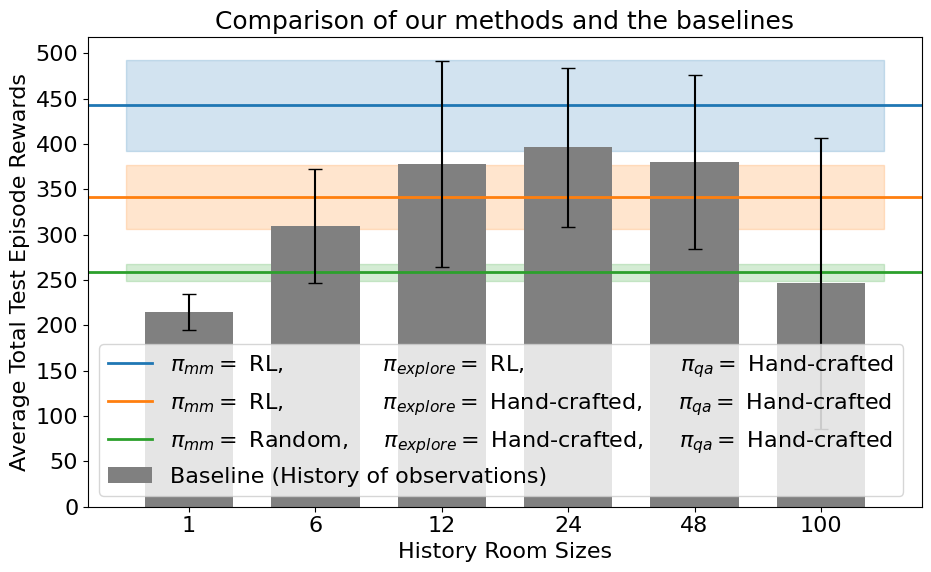

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Updating font size
new_font_size = 16
plt.rcParams.update(
    {"font.size": new_font_size}
)  # Update default font size for all elements

# Data for the plot
our_method_names = [
    "$\pi_{mm} =$ RL,              $\pi_{explore} =$ RL,                      $\pi_{qa} =$ Hand-crafted",
    "$\pi_{mm} =$ RL,              $\pi_{explore} =$ Hand-crafted,     $\pi_{qa} =$ Hand-crafted",
    "$\pi_{mm} =$ Random,     $\pi_{explore} =$ Hand-crafted,     $\pi_{qa} =$ Hand-crafted",
]

our_method_rewards = [258.51, 341.7, 442.7][::-1]
our_method_errors = [9.17, 34.94, 50.45][::-1]
history_sizes = [1, 6, 12, 24, 48, 100]
history_rewards = [214.94, 309.62, 377.94, 396.43, 379.97, 246.26]
history_errors = [19.94, 63.30, 113.98, 87.84, 95.76, 160.85]

# Updated colors for a more professional look
method_colors = ["#1f77b4", "#ff7f0e", "#2ca02c"]  # Blue, Orange, Green

plt.figure(figsize=(10, 6))

# Horizontal lines for 'Our method' with different colors
for i, (reward, error, color) in enumerate(
    zip(our_method_rewards, our_method_errors, method_colors)
):
    plt.axhline(
        y=reward, color=color, linestyle="-", linewidth=2, label=our_method_names[i]
    )
    plt.fill_between(
        np.linspace(-0.5, len(history_sizes) - 0.5, 500),
        reward - error,
        reward + error,
        color=color,
        alpha=0.2,
    )

# Bar chart for 'Baseline (History)'
bar_width = 0.7  # width of the bars
bar_positions = np.arange(len(history_sizes))  # positions for the bars
plt.bar(
    bar_positions,
    history_rewards,
    width=bar_width,
    yerr=history_errors,
    capsize=5,
    color="gray",
    label="Baseline (History of observations)",
)  # Red for baseline

# Setting the x-axis labels to only show history room sizes
plt.xticks(bar_positions, list(map(str, history_sizes)), rotation=0)

# Fine-tuning the y-axis
y_min, y_max = 0, 530
plt.yticks(np.arange(y_min, y_max, 50), fontsize=new_font_size)

plt.xlabel("History Room Sizes", fontsize=new_font_size)
plt.ylabel("Average Total Test Episode Rewards", fontsize=new_font_size)
plt.title("Comparison of our methods and the baselines", fontsize=new_font_size + 2)

plt.legend(loc="lower left", fontsize=new_font_size)
plt.tight_layout()

plt.savefig("./figures/final-results.pdf")
plt.savefig("./figures/final-results.png")
plt.show()

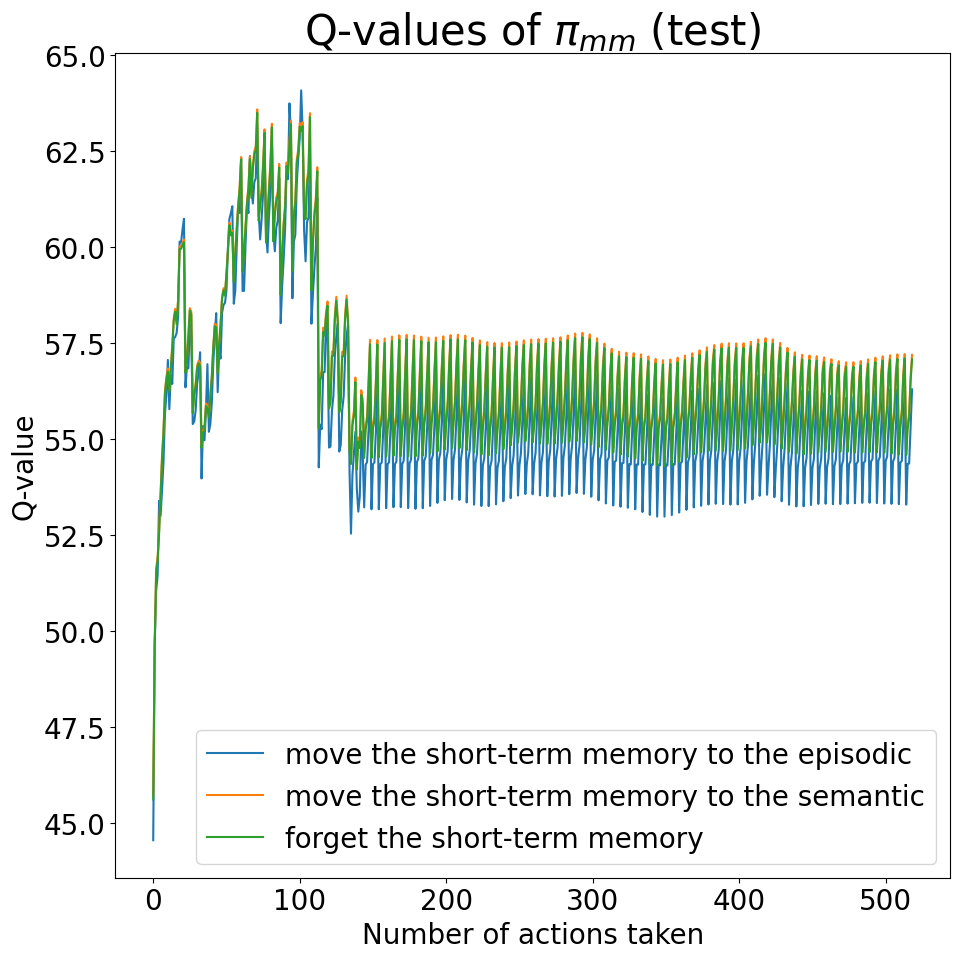

In [1]:
from humemai.utils import read_pickle
import matplotlib.pyplot as plt
import numpy as np

agent = read_pickle("./trained-agents/mm/2023-12-28 18:13:03.001952/agent.pkl")

# Updating font size
new_font_size = 20
plt.rcParams.update(
    {"font.size": new_font_size}
)  # Update default font size for all elements


plt.figure(figsize=(10, 10))
labels = [
    "move the short-term memory to the episodic",
    "move the short-term memory to the semantic",
    "forget the short-term memory",
]

plt.title("Q-values of $\pi_{mm}$ (test)", fontsize=new_font_size + 10)
for action_number in range(len(agent.q_values["test"][0])):
    plt.plot(
        [q_values_[action_number] for q_values_ in agent.q_values["test"]],
        label=labels[action_number],
    )
plt.legend(loc="lower right", fontsize=new_font_size)
plt.xlabel("Number of actions taken", fontsize=new_font_size)
plt.ylabel("Q-value", fontsize=new_font_size)
plt.tight_layout()
plt.savefig("./figures/q-values-test-mm.pdf")
plt.savefig("./figures/q-values-test-mm.png")
plt.show()

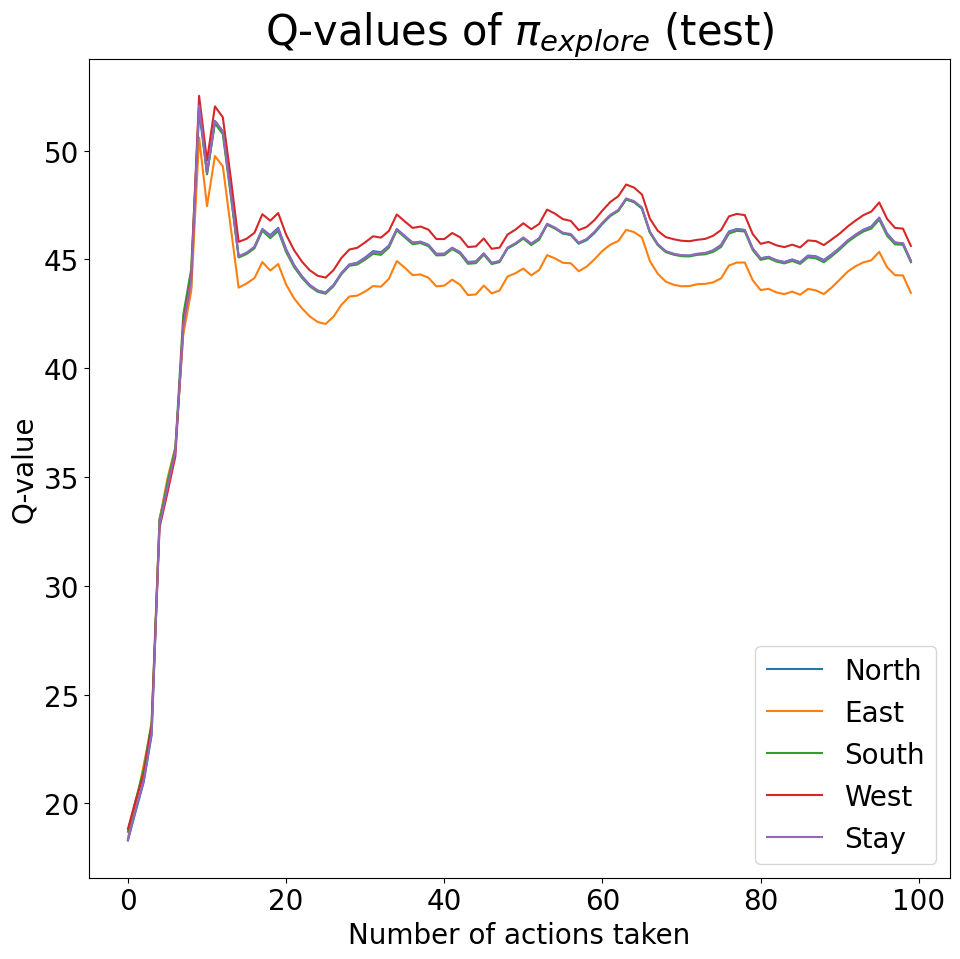

In [2]:
agent = read_pickle(
    "./trained-agents/explore/2024-01-06 20:04:03.511403/agent.pkl"
)

plt.figure(figsize=(10, 10))
labels = ["North", "East", "South", "West", "Stay"]


plt.title("Q-values of $\pi_{explore}$ (test)", fontsize=new_font_size + 10)
for action_number in range(len(agent.q_values["test"][0])):
    plt.plot(
        [q_values_[action_number] for q_values_ in agent.q_values["test"]],
        label=labels[action_number],
    )
plt.legend(loc="lower right", fontsize=new_font_size)
plt.xlabel("Number of actions taken", fontsize=new_font_size)
plt.ylabel("Q-value", fontsize=new_font_size)
plt.tight_layout()
plt.savefig("./figures/q-values-test-explore.pdf")
plt.savefig("./figures/q-values-test-explore.png")
plt.show()

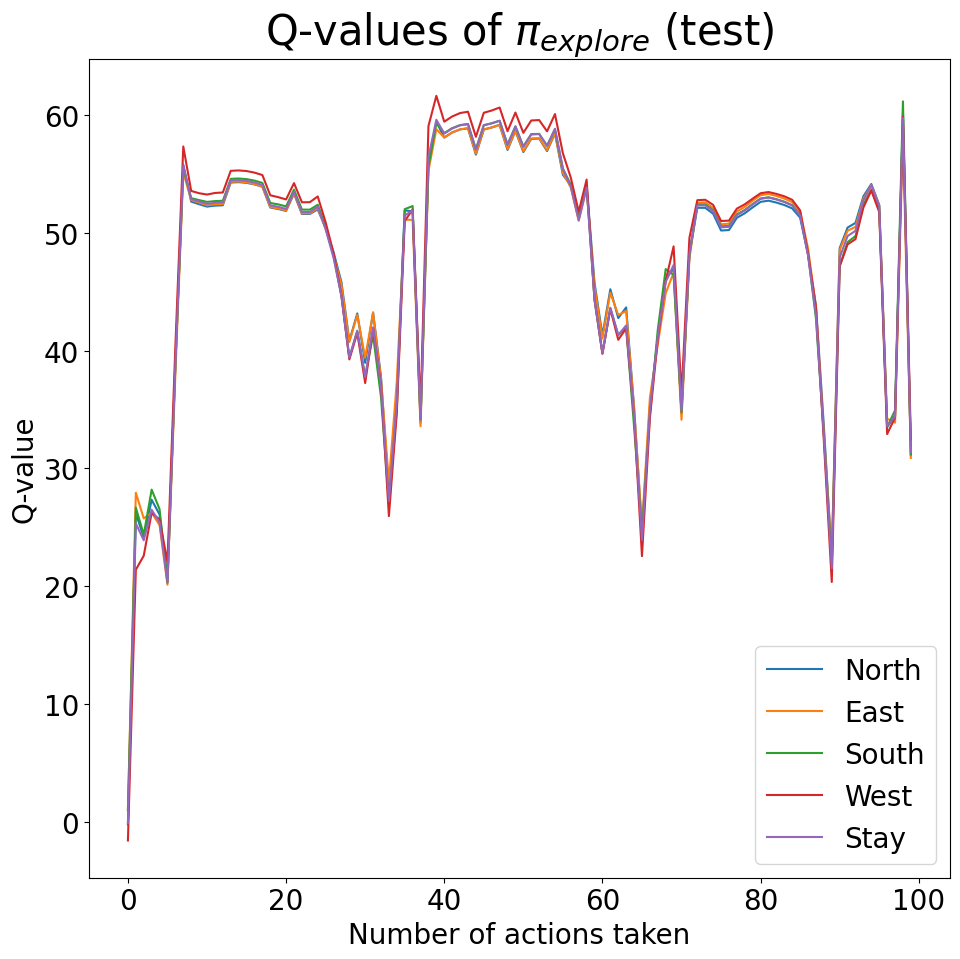

In [3]:
agent = read_pickle(
    "./training-results/baselines/dqn/history_block_size=24/2024-01-12 16:33:47.771934/agent.pkl"
)

# Updating font size
new_font_size = 20
plt.rcParams.update(
    {"font.size": new_font_size}
)  # Update default font size for all elements


plt.figure(figsize=(10, 10))
labels = ["North", "East", "South", "West", "Stay"]


plt.title("Q-values of $\pi_{explore}$ (test)", fontsize=new_font_size + 10)
for action_number in range(len(agent.q_values["test"][0])):
    plt.plot(
        [q_values_[action_number] for q_values_ in agent.q_values["test"]],
        label=labels[action_number],
    )
plt.legend(loc="lower right", fontsize=new_font_size)
plt.xlabel("Number of actions taken", fontsize=new_font_size)
plt.ylabel("Q-value", fontsize=new_font_size)
plt.tight_layout()
plt.savefig("./figures/q-values-test-baseline.pdf")
plt.savefig("./figures/q-values-test-baseline.png")
plt.show()